From Dan Calistrate, a game-theory-focused poker problem:

Baby poker is played by two players, each holding a single die in a cup. The game starts with each player anteing \$1. Then both shake their die, roll it, and look at their own die only. Player A can then either “call,” in which case both dice are shown and the player with the higher number wins the \$2 on the table, or Player A can “raise,” betting one more dollar. If A raises, then B has the option to either “call” by matching A’s second dollar, after which the higher number wins the \$4 on the table, or B can “fold,” in which case A wins but B is out only his original \$1. No other plays are made, and if the dice match, a called pot is split equally.

What is the optimal strategy for each player? Under those strategies, how much is a game of baby poker worth to Player A? In other words, how much should A pay B beforehand to make it a fair game?

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

Test if randint is biased

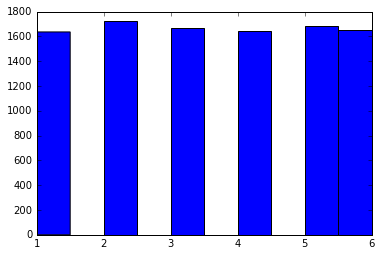

In [113]:
a=[]
for ii in range(int(1e4)):
    a.append(random.randint(1,6))
_=plt.hist(a)

The ultimuate outcome is either: A > B, A < B, or A = B. However, when:
1. A>B: A calls = A +1, B -1; A raises and B calls = A +2, B -2; A raises and B folds = A +1, B -1
2. A<B: A calls = A -1, B +1; A raises and B calls = A -2, B +2; A raises and B folds = A +1, B -1
3. A=B: A calls = A +0, B +0; A raises and B calls = A +0, B +0; A raises and B folds = A +1, B -1

<br />Therefore, when A > B, in long term, A expects to win \$4 each time and B loses \$4 each time. 
<br />Similarly, when A < B, A expects to lose \$4 each time and B wins \$4 each time.
<br />When A = B, A expects to win \$1 each time and B loses \$1 each time.

In [132]:
simTimes = 1e6
result = []
for ii in range(int(simTimes)):
    A = random.randint(1,6);B = random.randint(1,6)
    result.append([A,B])
result = np.array(result)

Win_A = np.where(result[:,0] > result[:,1])[0]
Win_B = np.where(result[:,0] < result[:,1])[0]
Tie = np.where(result[:,0] == result[:,1])[0]

Prob_A_win = len(Win_A) / simTimes
Prob_B_win = len(Win_B) / simTimes
Prob_Tie   = len(Tie)   / simTimes

Expected_A = Prob_A_win * 4 + Prob_B_win * -4 + Prob_Tie * 1
Expected_B = Prob_A_win * -4 + Prob_B_win * 4 + Prob_Tie * -1

print('Expected A = %.4f '% Expected_A,'Expected B = %.4f'% Expected_B)

Expected A = 0.1663  Expected B = -0.1663


In theory, P(A > B)=15/36, P(A < B)=15/36, and P(A = B)=6/36. So, 
$$ E[A] = \frac{15}{36} * 4 + \frac{15}{36} * (-4) + \frac{6}{36} * 1 =0.21428$$

$$ E[B] = \frac{15}{36} * (-4) + \frac{15}{36} * 4 + \frac{6}{36} * (-1)=-0.119047$$

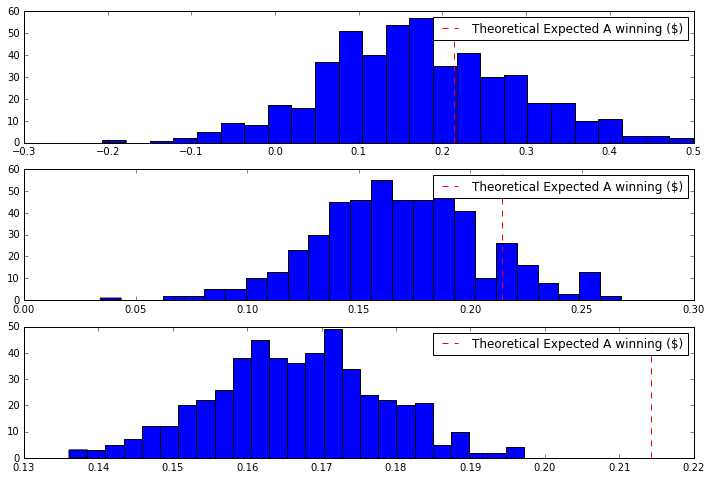

In [152]:
doTimes = 500
simTimes = [1e3,1e4,1e5]
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(12,8))
for kk,simTime in enumerate(simTimes):
    allResults = []
    for ii in range(doTimes):
        result = []
        for jj in range(int(simTime)):
            A = random.randint(1,6);B = random.randint(1,6)
            result.append([A,B])
        result = np.array(result)
        Win_A = np.where(result[:,0] > result[:,1])[0]
        Win_B = np.where(result[:,0] < result[:,1])[0]
        Tie = np.where(result[:,0] == result[:,1])[0]

        Prob_A_win = len(Win_A) / len(result)
        Prob_B_win = len(Win_B) / len(result)
        Prob_Tie   = len(Tie)   / len(result)

        Expected_A = Prob_A_win * 4 + Prob_B_win * -4 + Prob_Tie * 1
        Expected_B = Prob_A_win * -4 + Prob_B_win * 4 + Prob_Tie * -1
        allResults.append([Expected_A,Expected_B])

    allResults = np.array(allResults)
    
    _=ax[kk].hist(allResults[:,0],bins=25)
    ax[kk].axvline(0.21428,color='r',linestyle='--',label='Theoretical Expected A winning ($)')
    ax[kk].legend()

In [167]:
doTimes = 50
simTimes = [1e3,1e4,1e5]
temp=[]
for kk,simTime in enumerate(simTimes):
    allResults = []
    for ii in range(doTimes):
        result = []
        for jj in range(int(simTime)):
            A = random.randint(1,6);B = random.randint(1,6)
            result.append([A,B])
        result = np.array(result)
        Win_A = np.where(result[:,0] > result[:,1])[0]
        Win_B = np.where(result[:,0] < result[:,1])[0]
        Tie = np.where(result[:,0] == result[:,1])[0]

        Prob_A_win = len(Win_A) / len(result)
        Prob_B_win = len(Win_B) / len(result)
        Prob_Tie   = len(Tie)   / len(result)
        allResults.append([Prob_A_win,Prob_B_win,Prob_Tie])
    temp.append(allResults)

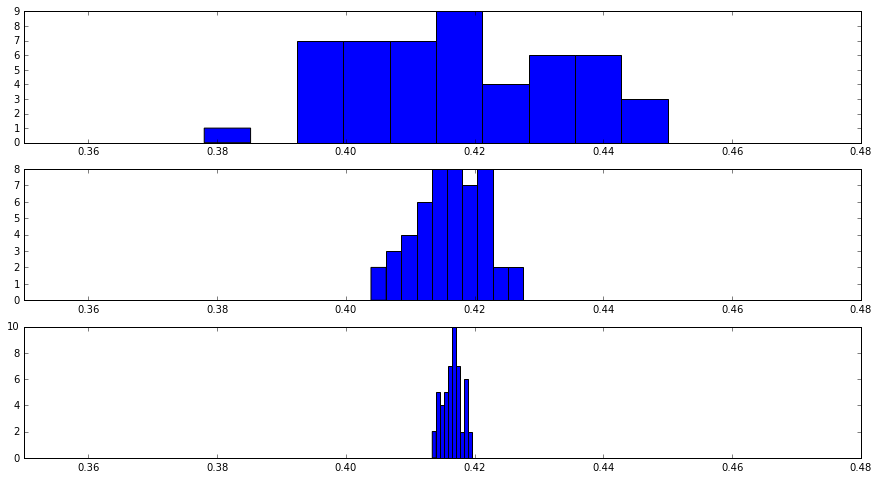

In [173]:
fig,ax = plt.subplots(3,1,figsize=(15,8))
for i in range(3):
    ax[i].hist(np.array(temp[i])[:,0])
    ax[i].set(xlim=(0.35,0.48))